In [61]:
import numpy as np 
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction import text
import warnings
warnings.filterwarnings("ignore")

## Inspecting Dataset

In [62]:
file_path = 'urdu_sarcastic_dataset.csv'
urdu_doc = pd.read_csv(file_path)

# Drop unnecessary columns
urdu_doc = urdu_doc.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'])

# Remove duplicates
urdu_doc.drop_duplicates(subset='urdu_text', inplace=True)

# Handle missing values (drop rows where text or label is missing)
urdu_doc.dropna(subset=['urdu_text', 'is_sarcastic'], inplace=True)

# Ensure labels are encoded as integer
urdu_doc['is_sarcastic'] = urdu_doc['is_sarcastic'].astype(int)


print(urdu_doc.head(10))

                                           urdu_text  is_sarcastic
0  🤣😂😂 ہو لینے دے میری شادی فسادن ٹھیک ہے کوجی نہ...             1
1  چل مہمانوں میں کھانا سرو کر چڑیل چاچی نوں دسدی...             1
2  کامران خان آپکی دن بھریہ زمہ داری لگائی گئی اپ...             0
3                                       نہیں پائین 😎             0
4   `` مراد علی شاہ کے بھیس میں ڈی جی آئی ایس آئی...             1
5        قابل اعتبار ہی اکثر قاتل اعتبار ہوتے ہیں 💔🔥             1
6      انساں کو تھکا دیتا ہے سوچوں کا سفر بھی ... 🍁🥀             0
7                              حامد میر صاحب ویلڈن👏😊             0
8  یار وچارہ ویلا ہوندا ہے اس آرے لگا ہویا ہے😂😂 ت...             1
9           یہ سمجھتے ہیں سارا پاکستان بیوقوف ھے 😂😂😂             1


In [63]:
urdu_doc.shape

(15813, 2)

In [3]:
urdu_doc.head(10)

,urdu_text,is_sarcastic
0,🤣😂😂 ہو لینے دے میری شادی فسادن ٹھیک ہے کوجی نہ...,1
1,چل مہمانوں میں کھانا سرو کر چڑیل چاچی نوں دسدی...,1
2,کامران خان آپکی دن بھریہ زمہ داری لگائی گئی اپ...,0
3,نہیں پائین 😎,0
4,`` مراد علی شاہ کے بھیس میں ڈی جی آئی ایس آئی...,1
5,قابل اعتبار ہی اکثر قاتل اعتبار ہوتے ہیں 💔🔥,1
6,انساں کو تھکا دیتا ہے سوچوں کا سفر بھی ... 🍁🥀,0
7,حامد میر صاحب ویلڈن👏😊,0
8,یار وچارہ ویلا ہوندا ہے اس آرے لگا ہویا ہے😂😂 ت...,1
9,یہ سمجھتے ہیں سارا پاکستان بیوقوف ھے 😂😂😂,1


In [5]:
print(urdu_doc.head(5))

                                           urdu_text  is_sarcastic
0  🤣😂😂 ہو لینے دے میری شادی فسادن ٹھیک ہے کوجی نہ...             1
1  چل مہمانوں میں کھانا سرو کر چڑیل چاچی نوں دسدی...             1
2  کامران خان آپکی دن بھریہ زمہ داری لگائی گئی اپ...             0
3                                       نہیں پائین 😎             0
4   `` مراد علی شاہ کے بھیس میں ڈی جی آئی ایس آئی...             1


#Phase 1
# Text preprocessing

### Data Cleansing


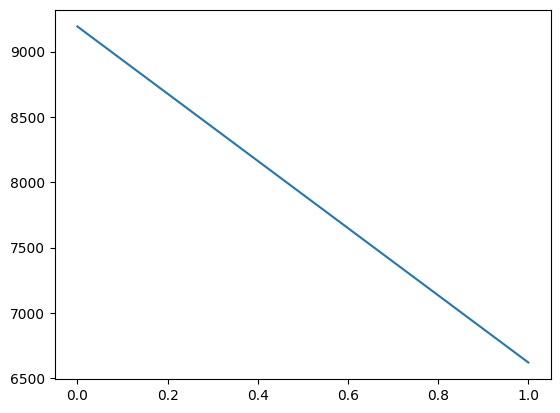

In [6]:
plt.plot(urdu_doc['is_sarcastic'].value_counts())

In [7]:
urdu_doc['is_sarcastic'].value_counts()

is_sarcastic
0    9192
1    6621
Name: count, dtype: int64

### Removing stops words

In [64]:
urdu_stopwords = [
    "ہے", "یہ", "کے", "میں", "کی", "کو", "سے", "اور", "ایک", "کہ", "کا", "جو"
   
]

def remove_stopwords(text):
    if pd.isnull(text):  # Handle NaN or missing values
        return text
    
    new_text = []
    
    # Split the text and remove stopwords
    for word in str(text).split():
        if word not in urdu_stopwords:  # Check if word is not in stopwords
            new_text.append(word)
    
    return " ".join(new_text)

In [65]:
urdu_doc['urdu_text'] = urdu_doc['urdu_text'].apply(remove_stopwords)

In [6]:
print(urdu_doc.head(5))

                                           urdu_text  is_sarcastic
0  🤣😂😂 ہو لینے دے میری شادی فسادن ٹھیک کوجی نہیں ...             1
1  چل مہمانوں کھانا سرو کر چڑیل چاچی نوں دسدی آں ...             1
2  کامران خان آپکی دن بھریہ زمہ داری لگائی گئی اپ...             0
3                                       نہیں پائین 😎             0
4  `` مراد علی شاہ بھیس ڈی جی آئی ایس آئی تھے '' ...             1


Data Cleaning

In [66]:
import emoji


def translate_emojis(text):
        return emoji.demojize(text)
def removing_unwanted_data(text):
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    
    


    # Tokenize each word
    text= translate_emojis(text)
    
        
    return text


In [67]:
urdu_doc['text_cleaned'] = urdu_doc['urdu_text'].apply(lambda x: removing_unwanted_data(str(x)) )


In [68]:
print(urdu_doc.head(10))  

                                           urdu_text  is_sarcastic  \
0  🤣😂😂 ہو لینے دے میری شادی فسادن ٹھیک کوجی نہیں ...             1   
1  چل مہمانوں کھانا سرو کر چڑیل چاچی نوں دسدی آں ...             1   
2  کامران خان آپکی دن بھریہ زمہ داری لگائی گئی اپ...             0   
3                                       نہیں پائین 😎             0   
4  `` مراد علی شاہ بھیس ڈی جی آئی ایس آئی تھے '' ...             1   
5        قابل اعتبار ہی اکثر قاتل اعتبار ہوتے ہیں 💔🔥             1   
6               انساں تھکا دیتا سوچوں سفر بھی ... 🍁🥀             0   
7                              حامد میر صاحب ویلڈن👏😊             0   
8  یار وچارہ ویلا ہوندا اس آرے لگا ہویا ہے😂😂 تسی ...             1   
9              سمجھتے ہیں سارا پاکستان بیوقوف ھے 😂😂😂             1   

                                        text_cleaned  
0  :rolling_on_the_floor_laughing::face_with_tear...  
1  چل مہمانوں کھانا سرو کر چڑیل چاچی نوں دسدی آں ...  
2  کامران خان آپکی دن بھریہ زمہ داری لگائی گئی اپ...  
3        

In [10]:
def filter_short_posts(text, min_words=3):
    return text if len(text.split()) >= min_words else ""


In [11]:
urdu_doc['text_cleaned'] = urdu_doc['text_cleaned'].apply(lambda x:filter_short_posts(str(x)))

In [12]:
print(urdu_doc.head(10))  

                                           urdu_text  is_sarcastic  \
0  🤣😂😂 ہو لینے دے میری شادی فسادن ٹھیک کوجی نہیں ...             1   
1  چل مہمانوں کھانا سرو کر چڑیل چاچی نوں دسدی آں ...             1   
2  کامران خان آپکی دن بھریہ زمہ داری لگائی گئی اپ...             0   
3                                       نہیں پائین 😎             0   
4  `` مراد علی شاہ بھیس ڈی جی آئی ایس آئی تھے '' ...             1   
5        قابل اعتبار ہی اکثر قاتل اعتبار ہوتے ہیں 💔🔥             1   
6               انساں تھکا دیتا سوچوں سفر بھی ... 🍁🥀             0   
7                              حامد میر صاحب ویلڈن👏😊             0   
8  یار وچارہ ویلا ہوندا اس آرے لگا ہویا ہے😂😂 تسی ...             1   
9              سمجھتے ہیں سارا پاکستان بیوقوف ھے 😂😂😂             1   

                                        text_cleaned  
0  :rolling_on_the_floor_laughing::face_with_tear...  
1  چل مہمانوں کھانا سرو کر چڑیل چاچی نوں دسدی آں ...  
2  کامران خان آپکی دن بھریہ زمہ داری لگائی گئی اپ...  
3        

Phase 2: Stemming and Lemmatization for Urdu Text

In [13]:
def urdu_stemming(text):
    # Simple stemming logic: strip common suffixes
    suffixes = ['ا', 'ی', 'وں', 'یں', 'وں', 'ے', 'کی', 'کے']
    stemmed_words = []

    for word in text.split():
        for suffix in suffixes:
            if word.endswith(suffix):
                word = word[:-len(suffix)]  # Remove the suffix
        stemmed_words.append(word)

    return ' '.join(stemmed_words)


In [14]:
urdu_doc['text_cleaned'] = urdu_doc['text_cleaned'].apply(lambda x:urdu_stemming(str(x)))

In [15]:
print(urdu_doc.head(10))

                                           urdu_text  is_sarcastic  \
0  🤣😂😂 ہو لینے دے میری شادی فسادن ٹھیک کوجی نہیں ...             1   
1  چل مہمانوں کھانا سرو کر چڑیل چاچی نوں دسدی آں ...             1   
2  کامران خان آپکی دن بھریہ زمہ داری لگائی گئی اپ...             0   
3                                       نہیں پائین 😎             0   
4  `` مراد علی شاہ بھیس ڈی جی آئی ایس آئی تھے '' ...             1   
5        قابل اعتبار ہی اکثر قاتل اعتبار ہوتے ہیں 💔🔥             1   
6               انساں تھکا دیتا سوچوں سفر بھی ... 🍁🥀             0   
7                              حامد میر صاحب ویلڈن👏😊             0   
8  یار وچارہ ویلا ہوندا اس آرے لگا ہویا ہے😂😂 تسی ...             1   
9              سمجھتے ہیں سارا پاکستان بیوقوف ھے 😂😂😂             1   

                                        text_cleaned  
0  :rolling_on_the_floor_laughing::face_with_tear...  
1  چل مہمان کھان سرو کر چڑیل چاچ ن دسد آں میں:fac...  
2  کامران خان آپک دن بھریہ زمہ دار لگائ گئ اپوزیش...  
3        

### Lemmatization



In [16]:
lemmatization_dict = {
    "چل": "چل",
    "رہی": "رہ",
    "ہونا": "ہو",
    "ہو": "ہو"
    
}

def urdu_lemmatization(text):
    lemmatized_words = []
    
    for word in text.split():
        lemmatized_word = lemmatization_dict.get(word, word)
        #returns the lemmatized form. If not found, it returns the original word.
        lemmatized_words.append(lemmatized_word)
    
    return ' '.join(lemmatized_words)

# Sample text


In [17]:
urdu_doc['text_cleaned'] = urdu_doc['text_cleaned'].apply(lambda x:urdu_lemmatization(str(x)))

In [18]:
print(urdu_doc.head(10))

                                           urdu_text  is_sarcastic  \
0  🤣😂😂 ہو لینے دے میری شادی فسادن ٹھیک کوجی نہیں ...             1   
1  چل مہمانوں کھانا سرو کر چڑیل چاچی نوں دسدی آں ...             1   
2  کامران خان آپکی دن بھریہ زمہ داری لگائی گئی اپ...             0   
3                                       نہیں پائین 😎             0   
4  `` مراد علی شاہ بھیس ڈی جی آئی ایس آئی تھے '' ...             1   
5        قابل اعتبار ہی اکثر قاتل اعتبار ہوتے ہیں 💔🔥             1   
6               انساں تھکا دیتا سوچوں سفر بھی ... 🍁🥀             0   
7                              حامد میر صاحب ویلڈن👏😊             0   
8  یار وچارہ ویلا ہوندا اس آرے لگا ہویا ہے😂😂 تسی ...             1   
9              سمجھتے ہیں سارا پاکستان بیوقوف ھے 😂😂😂             1   

                                        text_cleaned  
0  :rolling_on_the_floor_laughing::face_with_tear...  
1  چل مہمان کھان سرو کر چڑیل چاچ ن دسد آں میں:fac...  
2  کامران خان آپک دن بھریہ زمہ دار لگائ گئ اپوزیش...  
3        

tokenitioz

In [69]:
def tokenize_urdu(text):
    tokens = text.split()  # Simple split based on spaces for now
    return tokens
urdu_doc['text_cleaned'] = urdu_doc['text_cleaned'].apply(tokenize_urdu)

In [70]:
print(urdu_doc.head(10))

                                           urdu_text  is_sarcastic  \
0  🤣😂😂 ہو لینے دے میری شادی فسادن ٹھیک کوجی نہیں ...             1   
1  چل مہمانوں کھانا سرو کر چڑیل چاچی نوں دسدی آں ...             1   
2  کامران خان آپکی دن بھریہ زمہ داری لگائی گئی اپ...             0   
3                                       نہیں پائین 😎             0   
4  `` مراد علی شاہ بھیس ڈی جی آئی ایس آئی تھے '' ...             1   
5        قابل اعتبار ہی اکثر قاتل اعتبار ہوتے ہیں 💔🔥             1   
6               انساں تھکا دیتا سوچوں سفر بھی ... 🍁🥀             0   
7                              حامد میر صاحب ویلڈن👏😊             0   
8  یار وچارہ ویلا ہوندا اس آرے لگا ہویا ہے😂😂 تسی ...             1   
9              سمجھتے ہیں سارا پاکستان بیوقوف ھے 😂😂😂             1   

                                        text_cleaned  
0  [:rolling_on_the_floor_laughing::face_with_tea...  
1  [چل, مہمانوں, کھانا, سرو, کر, چڑیل, چاچی, نوں,...  
2  [کامران, خان, آپکی, دن, بھریہ, زمہ, داری, لگائ...  
3      [ن

In [32]:
print(urdu_doc.head(10))

                                           urdu_text  is_sarcastic  \
0  🤣😂😂 ہو لینے دے میری شادی فسادن ٹھیک کوجی نہیں ...             1   
1  چل مہمانوں کھانا سرو کر چڑیل چاچی نوں دسدی آں ...             1   
2  کامران خان آپکی دن بھریہ زمہ داری لگائی گئی اپ...             0   
3                                       نہیں پائین 😎             0   
4  `` مراد علی شاہ بھیس ڈی جی آئی ایس آئی تھے '' ...             1   
5        قابل اعتبار ہی اکثر قاتل اعتبار ہوتے ہیں 💔🔥             1   
6               انساں تھکا دیتا سوچوں سفر بھی ... 🍁🥀             0   
7                              حامد میر صاحب ویلڈن👏😊             0   
8  یار وچارہ ویلا ہوندا اس آرے لگا ہویا ہے😂😂 تسی ...             1   
9              سمجھتے ہیں سارا پاکستان بیوقوف ھے 😂😂😂             1   

                                        text_cleaned  
0  [:rolling_on_the_floor_laughing::face_with_tea...  
1  [چل, مہمان, کھان, سرو, کر, چڑیل, چاچ, ن, دسد, ...  
2  [کامران, خان, آپک, دن, بھریہ, زمہ, دار, لگائ, ...  
3        

2. Tf-IDF (Term Frequency-Inverse Document Frequency):

In [37]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

if 'urdu_text' not in urdu_doc.columns:
    raise ValueError("The specified text column does not exist in the DataFrame.")

# Fill NaN values with empty strings
urdu_doc['text_cleaned'] = urdu_doc['urdu_text'].fillna('')

# Apply TF-IDF to the 'text_cleaned' column
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # max_features limits the number of features
tfidf_matrix = tfidf_vectorizer.fit_transform(urdu_doc['text_cleaned'])

# Convert the TF-IDF matrix into a DataFrame for better readability
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Sum the TF-IDF scores for each word
tfidf_scores = tfidf_df.sum().sort_values(ascending=False)

# Display the top 10 words with the highest TF-IDF scores
top_10_words = tfidf_scores.head(10)
print("Top 10 words with the highest TF-IDF scores:")
print(top_10_words)


Top 10 words with the highest TF-IDF scores:
ہے      2064.737440
میں     1544.132987
کی      1486.719459
کے      1476.262468
سے      1232.837948
کو      1202.952322
کا      1187.798265
نہیں    1138.839427
تو      1128.412590
ہیں     1112.605098
dtype: float64


word 2 vec

In [77]:
# CBOW (Continuous Bag of Words)

import pandas as pd
from gensim.models import Word2Vec

# Training data


# Training the CBOW model with sg=0
model_cbow_sg0 = Word2Vec(urdu_doc['text_cleaned'], min_count=1, window=3, sg=0,vector_size= 5)

# Accessing word vectors for CBOW (sg=0)
word_vectors_sg0 = model_cbow_sg0.wv

# Creating a DataFrame for word vectors with CBOW (sg=0)
word_vectors_df_sg0 = pd.DataFrame(word_vectors_sg0.vectors, index=word_vectors_sg0.index_to_key)


# Displaying the word vectors DataFrame
word_vectors_df_sg0.head(15)



,0,1,2,3,4
,-1.631688,-1.537113,-1.382816,-0.931264,-1.439911
ا,-1.951496,-1.836074,-1.874789,-1.241786,-1.781102
ی,-1.955267,-2.012426,-1.799330,-0.926513,-2.137409
و,-1.838868,-1.888490,-1.847167,-1.148612,-2.012259
ر,-1.668772,-1.951146,-2.113344,-1.558052,-2.141710
ن,-1.812945,-1.994869,-1.938829,-1.251881,-2.065731
ہ,-1.969456,-1.321615,-1.248916,-0.479507,-1.345282
ک,-1.769614,-1.673601,-1.487115,-0.762682,-1.808382
ت,-2.139714,-1.701169,-1.599855,-1.034887,-1.292345
ل,-1.923684,-1.017191,-2.037110,-1.495398,-1.313433


In [50]:
import pandas as pd
from gensim.models import Word2Vec

# Tokenization function
def tokenize(text):
   
    return nltk.word_tokenize(text)


sentences = urdu_doc['urdu_text'].tolist()



# Train the Word2Vec model on the tokenized sentences
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Step 3: Find Similar Words

# Find the top 5 words most similar to "اچھا" (good)
if "اچھا" in model.wv:
    similar_words = model.wv.most_similar("اچھا", topn=5)
    print("Top 5 words most similar to 'اچھا':")
    for word, similarity in similar_words:
        print(f"{word}: {similarity:.4f}")
else:
    print("Word 'اچھا' not found in the vocabulary")
   



Word 'اچھا' not found in the vocabulary


Phase 4: N-grams Analysis

1. Unigram, Bigram, and Trigram Analysis:

In [39]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# Step 1: Load and Clean the Data

# Load the dataset
file_path = 'urdu_sarcastic_dataset.csv'
urdu_data = pd.read_csv(file_path)

# Drop unnecessary columns
urdu_data = urdu_data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'])

# Remove duplicates
urdu_data.drop_duplicates(subset='urdu_text', inplace=True)

# Handle missing values (drop rows where text or label is missing)
urdu_data.dropna(subset=['urdu_text', 'is_sarcastic'], inplace=True)

# Ensure labels are encoded as integer
urdu_data['is_sarcastic'] = urdu_data['is_sarcastic'].astype(int)

# Step 2: Text Normalization

# Function to clean the Urdu text (remove emojis, punctuation, etc.)
def clean_urdu_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and special characters
    text = re.sub(r'\d+', '', text)      # Remove numbers
    text = text.strip()                  # Remove leading/trailing spaces
    return text

urdu_data['cleaned_text'] = urdu_data['urdu_text'].apply(clean_urdu_text)

# Step 3: Unigram, Bigram, and Trigram Analysis

# Tokenization function for proper Urdu word handling
def tokenize_urdu(text):
    tokens = text.split()  # Simple split based on spaces for now
    return tokens

# Vectorization for Unigrams, Bigrams, and Trigrams
def get_top_ngrams(corpus, n=None, ngram_range=(1, 1)):
    vec = CountVectorizer(ngram_range=ngram_range, tokenizer=tokenize_urdu).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Extract unigrams, bigrams, and trigrams
top_10_unigrams = get_top_ngrams(urdu_data['cleaned_text'], n=10, ngram_range=(1, 1))
top_10_bigrams = get_top_ngrams(urdu_data['cleaned_text'], n=10, ngram_range=(2, 2))
top_10_trigrams = get_top_ngrams(urdu_data['cleaned_text'], n=10, ngram_range=(3, 3))

# Display results
print("Top 10 Unigrams:", top_10_unigrams)
print("Top 10 Bigrams:", top_10_bigrams)
print("Top 10 Trigrams:", top_10_trigrams)

# Step 4: Handle challenges in Urdu tokenization (simple space-based splitting used here; can use advanced libraries for Urdu NLP)


Top 10 Unigrams: [('ہے', 7760), ('میں', 5647), ('کے', 5534), ('کی', 5309), ('سے', 4214), ('کو', 4205), ('کا', 3737), ('تو', 3707), ('اور', 3659), ('ہیں', 3447)]
Top 10 Bigrams: [('ہے کہ', 499), ('عمران خان', 369), ('کے لیے', 320), ('رہے ہیں', 306), ('ہے اور', 284), ('میں نے', 281), ('رہا ہے', 281), ('کے ساتھ', 276), ('ہوتا ہے', 274), ('نواز شریف', 274)]
Top 10 Trigrams: [('صلی اللہ علیہ', 86), ('پی ٹی آئی', 80), ('کر رہے ہیں', 75), ('آئی جی سندھ', 74), ('کی وجہ سے', 71), ('کو فالو کریں', 70), ('فالو کریں اور', 62), ('والوں کو فالو', 59), ('اللہ علیہ وآلہ', 59), ('علیہ وآلہ وسلم', 59)]


Phase 5: Sentiment Classification Model
1. Model Building:Logistic 
regression



In [41]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Check for NaN values in the feature and target columns
print("Checking for NaN values...")
print("Missing values in 'text_cleaned':", urdu_doc['text_cleaned'].isnull().sum())
print("Missing values in 'is_sarcastic':", urdu_doc['is_sarcastic'].isnull().sum())

# Fill NaN values in the text column with empty strings and drop rows with NaN in target
urdu_doc['text_cleaned'] = urdu_doc['text_cleaned'].fillna('')
urdu_doc = urdu_doc.dropna(subset=['is_sarcastic'])

# Define features and target variable
X = urdu_doc['text_cleaned']
y = urdu_doc['is_sarcastic']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature Extraction using TF-IDF
# Create a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data and transform the test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 4: Train a Logistic Regression Model
# Initialize the Logistic Regression model
logistic_model =LogisticRegression()

# Train the model using the training data
logistic_model.fit(X_train_tfidf, y_train)

# Step 5: Make Predictions on the Test Set
# Predict sentiment on the test data
y_pred = logistic_model.predict(X_test_tfidf)

# Step 6: Evaluate the Model
# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Output the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Checking for NaN values...
Missing values in 'text_cleaned': 0
Missing values in 'is_sarcastic': 56
Accuracy: 0.7886
Precision: 0.7777
Recall: 0.7858
F1-Score: 0.7817


In [42]:
from sklearn.metrics import classification_report, confusion_matrix

# Split data into training, validation, and test sets (70% train, 15% validation, 15% test)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

# Feature extraction (TF-IDF or Word2Vec)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

# Train the model on training data
logistic_model.fit(X_train_tfidf, y_train)

# Evaluate on validation set
y_val_pred = logistic_model.predict(X_val_tfidf)

# Evaluate model performance using precision, recall, and F1-score
print(classification_report(y_val, y_val_pred))

# Confusion matrix to see where the model makes errors
conf_matrix = confusion_matrix(y_val, y_val_pred)
print(conf_matrix)


              precision    recall  f1-score   support

         0.0       0.80      0.79      0.79      1534
         1.0       0.78      0.79      0.79      1467

    accuracy                           0.79      3001
   macro avg       0.79      0.79      0.79      3001
weighted avg       0.79      0.79      0.79      3001

[[1208  326]
 [ 305 1162]]


In [78]:
# CBOW (Continuous Bag of Words)

import pandas as pd
from gensim.models import Word2Vec
] = [['یہ', 'ایک', 'بہت', 'اچھا', 'دن'], ['مجھے', 'یہ', 'پسند', 'ہے'], ...]

# Training the CBOW model with sg=0
model_cbow_sg0 = Word2Vec(sentences=urdu_doc['text_cleaned'], min_count=1, window=3, sg=0, vector_size=5)

# Accessing word vectors for CBOW (sg=0)
word_vectors_sg0 = model_cbow_sg0.wv

# Check if "اچھا" is in the vocabulary
if "اچھا" in word_vectors_sg0:
    similar_words = word_vectors_sg0.most_similar("اچھا", topn=5)
    print("Top 5 words most similar to 'اچھا':")
    for word, similarity in similar_words:
        print(f"{word}: {similarity:.4f}")
else:
    print("Word 'اچھا' not found in the vocabulary")

# Displaying the word vectors DataFrame (optional)
word_vectors_df_sg0 = pd.DataFrame(word_vectors_sg0.vectors, index=word_vectors_sg0.index_to_key)
print(word_vectors_df_sg0.head(15))


Word 'اچھا' not found in the vocabulary
          0         1         2         3         4
  -1.679482 -1.634097 -1.259803 -0.905636 -1.535888
ا -1.978248 -1.758047 -1.815373 -1.119332 -1.980789
ی -2.094973 -2.200022 -1.493005 -0.810077 -1.965537
و -2.076765 -2.062260 -1.665722 -1.169203 -1.793715
ر -1.526314 -2.175138 -1.718325 -1.551897 -2.124195
ن -1.699904 -2.047819 -1.599524 -1.240470 -1.979849
ہ -1.851468 -1.169340 -1.211499 -0.287079 -1.652516
ک -1.674443 -1.998479 -1.182406 -0.894521 -1.574178
ت -1.848667 -1.373186 -1.601574 -0.899546 -1.770518
ل -2.016893 -1.083521 -1.868247 -1.401605 -1.366028
ے -2.214922 -1.939060 -1.194319 -0.330195 -1.678037
م -1.277416 -1.182115 -2.068278 -1.697559 -2.243335
ب -1.927191 -1.611825 -1.759189 -1.086884 -1.884008
س -2.041070 -1.956499 -1.449531 -1.130180 -1.390669
ھ -2.798220 -2.539895 -1.069149 -0.395377 -1.153318


                                           urdu_text  is_sarcastic  \
0  🤣😂😂 ہو لینے دے میری شادی فسادن ٹھیک کوجی نہیں ...             1   
1  چل مہمانوں کھانا سرو کر چڑیل چاچی نوں دسدی آں ...             1   
2  کامران خان آپکی دن بھریہ زمہ داری لگائی گئی اپ...             0   
3                                       نہیں پائین 😎             0   
4  `` مراد علی شاہ بھیس ڈی جی آئی ایس آئی تھے '' ...             1   

                                        text_cleaned  
0  🤣😂😂 ہو لینے دے میری شادی فسادن ٹھیک کوجی نہیں ...  
1  چل مہمانوں کھانا سرو کر چڑیل چاچی نوں دسدی آں ...  
2  کامران خان آپکی دن بھریہ زمہ داری لگائی گئی اپ...  
3                                       نہیں پائین 😎  
4  `` مراد علی شاہ بھیس ڈی جی آئی ایس آئی تھے '' ...  
<class 'pandas.core.frame.DataFrame'>
Index: 15813 entries, 0 to 20003
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   urdu_text     15813 non-null  object
 1   is_sarcastic  1

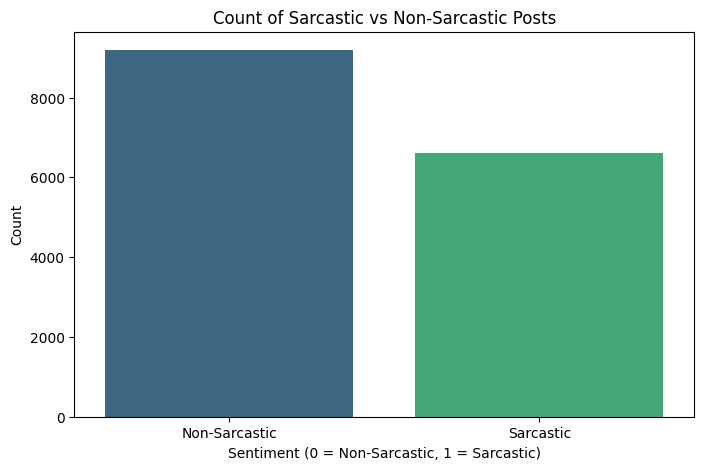

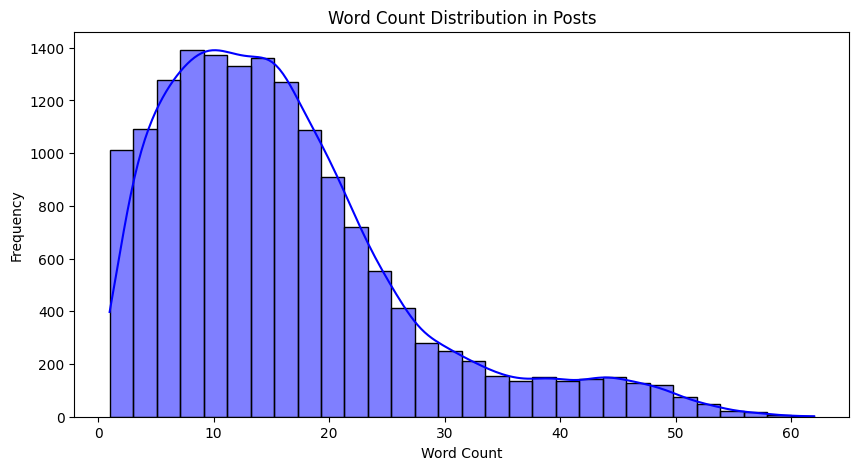

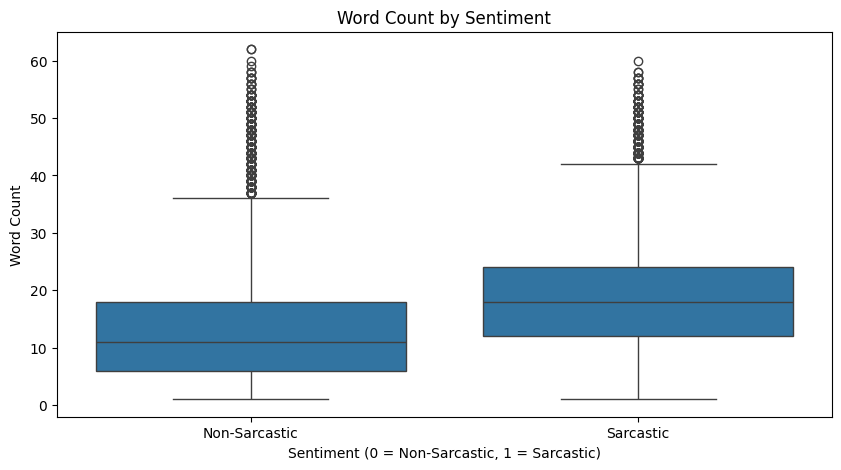

In [81]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Display the first few rows of the dataset
print(urdu_doc.head())

# Check the structure and data types
print(urdu_doc.info())

# Check for missing values
print(urdu_doc.isnull().sum())

# Basic statistical description of the dataset
print(urdu_doc.describe())

# Count the number of sarcastic and non-sarcastic posts
sentiment_counts = urdu_doc['is_sarcastic'].value_counts()

# Visualization of the sentiment counts
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Count of Sarcastic vs Non-Sarcastic Posts')
plt.xlabel('Sentiment (0 = Non-Sarcastic, 1 = Sarcastic)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Sarcastic', 'Sarcastic'])
plt.show()

# Additional Analysis: Word Count Distribution
urdu_doc['word_count'] = urdu_doc['urdu_text'].apply(lambda x: len(x.split()))

# Visualization of word count distribution
plt.figure(figsize=(10, 5))
sns.histplot(urdu_doc['word_count'], bins=30, kde=True, color='blue')
plt.title('Word Count Distribution in Posts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Boxplot to see the distribution of word counts by sentiment
plt.figure(figsize=(10, 5))
sns.boxplot(x='is_sarcastic', y='word_count', data=urdu_doc)
plt.title('Word Count by Sentiment')
plt.xlabel('Sentiment (0 = Non-Sarcastic, 1 = Sarcastic)')
plt.ylabel('Word Count')
plt.xticks(ticks=[0, 1], labels=['Non-Sarcastic', 'Sarcastic'])
plt.show()


-----------------------------------